In [1]:
import numpy as np 
import IPython.display as ipd
import matplotlib.pyplot as plt


def create_sinusoid(amp, freq, duration, sample_rate):
    t = np.arange(0, duration, 1.0 / sample_rate)

    return amp * np.sin(2 * np.pi * freq * t)
    
# complete the function k_harmonics  
def k_harmonics(k, amp, freq, duration, sample_rate): 
    data = create_sinusoid(amp, freq, duration*k, sample_rate)

    for K in range(1, k):
        harmonic = create_sinusoid(amp/(1+K), freq*(1+K), duration*k, sample_rate)
        harmonic[:K*int(sample_rate*duration)] = 0
        #count the amount of zeros in the harmonic
        data += harmonic

    return data

# use the code in a notebook cell to plot/listen to the resulting 
# signal of the k_harmonics function 
f0 = 220
sr = 8000
amp = 0.5
duration = 1 
k = 5 

signal = k_harmonics(k, amp, f0, duration, sr)
#plt.plot(np.abs(signal))
ipd.Audio(signal, rate=sr)


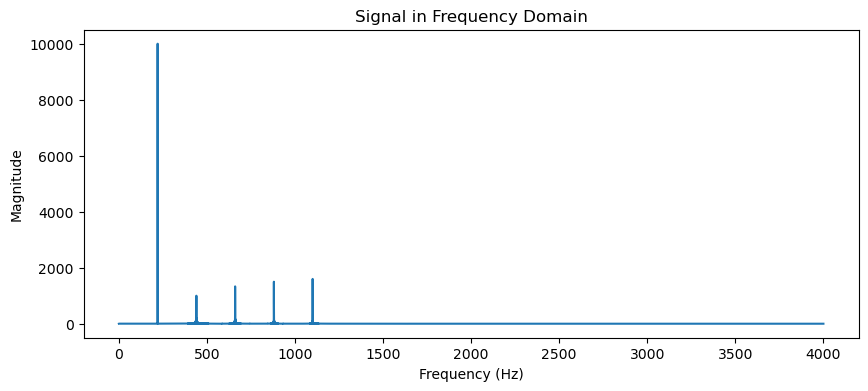

In [25]:
# Compute the FFT of the signal
fft = np.fft.fft(signal)

# Compute the frequencies associated with the FFT values
freqs = np.fft.fftfreq(len(fft), 1.0 / sr)

# Plot the absolute value of the FFT (to get the magnitude) in the frequency domain
plt.figure(figsize=(10, 4))
plt.plot(freqs[:len(freqs)//2], np.abs(fft)[:len(freqs)//2])  # Only plot up to the Nyquist frequency
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Signal in Frequency Domain')
plt.show()

In [15]:
import numpy as np 
import IPython.display as ipd
import matplotlib.pyplot as plt

def create_sinusoid(amp, freq, duration, sample_rate):
    t = np.arange(0, duration, 1.0 / sample_rate)
    return amp * np.sin(2 * np.pi * freq * t)
    
# complete the function k_harmonics  
def harmonics_arpeggiator(r, k, freq, dur, sample_rate):
    data = []
    for R in range (0, r):
        for K in range(1, k+1):
            data = np.concatenate((data, create_sinusoid(1, freq*(K), dur, sample_rate)))
    print(data.size)
    return data



# use the code in a notebook cell to plot/listen to the resulting 
# signal of the k_harmonics function 
f0 = 220
sr = 44100 
duration = 0.125
r = 4 
k = 12 

signal = harmonics_arpeggiator(r, k, f0, duration, sr)

# use in notebook for listening to audio 
ipd.Audio(signal, rate=sr)

264624


In [17]:
# In this question we will explore complex number addition and multiplication using different representations. Python has built-in suppor for complex numbers. The complex number 
#  has real part 
#  and imaginary part 
# . In Python the symbol 
#  is used to instead of 
# . The starter code has some Python code for creating complex numbers and doing mathematical operations with them.

# Your task is to write your own implementation of complex numbers and associated operations on them (`complex_add`, `complex_multiply`) using a dictionary to represent them. Instead of "Real" and "Imaginary" we will use "Robin" and "Ivory" as the keys. For example: c = {'Robin': 0.5, 'Ivory': 2} will correspond to the complex number 
# . Also write a function `from_polar` that takes as input a radial distance 
#  and an angle 
#  and return the corresponding complex number using the dictionary representation. See the starter code for usage.

import numpy as np 

c = 0.5 + 2*1j
print(c)
# alternatively the Complex constructor can be used
c = complex(0.5,2)
print(c)

d = 0.5 + 0.5*1j
# We can also add/multiply complex numbers
print(c+d)
print(c*d)
print(np.real(c))
print(np.imag(c))


c = {'Robin': 0.5, 'Ivory': 2}
d = {'Robin': 0.5, 'Ivory': 0.5}

print(c['Robin'])
print(c['Ivory'])

def complex_add(c1, c2):
     return {'Robin': c1['Robin'] + c2['Robin'], 'Ivory': c1['Ivory'] + c2['Ivory']}


def complex_mul(c1,c2):
    return {'Robin': c1['Robin']*c2['Robin'] - c1['Ivory']*c2['Ivory'], 'Ivory': c1['Robin']*c2['Ivory'] + c1['Ivory']*c2['Robin']}

def from_polar(r,theta): 
    return {'Robin': r*np.cos(theta), 'Ivory': r*np.sin(theta)}

# Example test code 
print(complex_add(c,d))
print(complex_mul(c,d))
print(from_polar(1,0))
print(complex_mul(from_polar(1,0), {'Robin':0,'Ivory':1}))

(0.5+2j)
(0.5+2j)
(1+2.5j)
(-0.75+1.25j)
0.5
2.0
0.5
2


[(1+0j)]
[(1+0j), (0.8660254037844387+0.49999999999999994j)]
[(1+0j), (0.8660254037844387+0.49999999999999994j), (0.5000000000000001+0.8660254037844386j)]
[(1+0j), (0.8660254037844387+0.49999999999999994j), (0.5000000000000001+0.8660254037844386j), (6.123233995736766e-17+1j)]
[(1+0j), (0.8660254037844387+0.49999999999999994j), (0.5000000000000001+0.8660254037844386j), (6.123233995736766e-17+1j), (-0.4999999999999998+0.8660254037844387j)]
[(1+0j), (0.8660254037844387+0.49999999999999994j), (0.5000000000000001+0.8660254037844386j), (6.123233995736766e-17+1j), (-0.4999999999999998+0.8660254037844387j), (-0.8660254037844387+0.49999999999999994j)]
[(1+0j), (0.8660254037844387+0.49999999999999994j), (0.5000000000000001+0.8660254037844386j), (6.123233995736766e-17+1j), (-0.4999999999999998+0.8660254037844387j), (-0.8660254037844387+0.49999999999999994j), (-1+1.2246467991473532e-16j)]
[(1+0j), (0.8660254037844387+0.49999999999999994j), (0.5000000000000001+0.8660254037844386j), (6.1232339957367

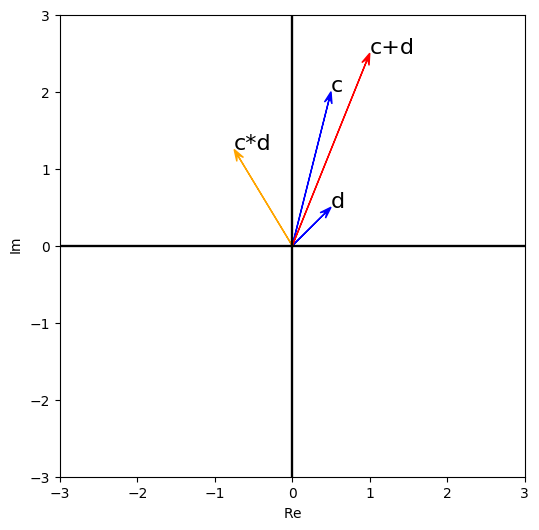

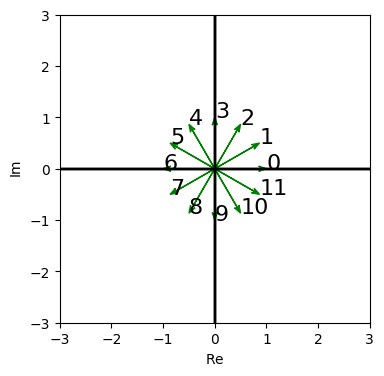

In [21]:
# Write a function `clock_hand_positions` that takes as input an integer number and returns a list of complex numbers corresponding to clock hand positions dividing the unit circle into equal angles. For example `clock_hand_positions(4)` would return 4 complex numbers with the first one being the unit length vector at 0 angle (3 on clock face), the second one being the unit length vector at pi/2 (12 on a clock face), the third one at -1 (9 on a clock face) and the last one at -j (6 on a clock face). The starter code contains some plotting code you can use to see that your function works as expected.

import numpy as np
import matplotlib.pyplot as plt


def plot_complex(plt, c, text = '', xlim=[-3,3], ylim=[-3,3],
                 color='black', linestyle='-'):
    plt.grid()
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.axhline(0, color='black')
    plt.axvline(0, color='black')
    plt.text(np.real(c), np.imag(c), text, size='16')

    plt.xlabel(r'$\mathrm{Re}$')
    plt.ylabel(r'$\mathrm{Im}$')
    plt.arrow(0.0, 0.0, np.real(c), np.imag(c),
              head_width=0.1, fc=color, ec=color,
              overhang=0.5, length_includes_head=True)

figsize = (6,6)
plt.figure(figsize=figsize)
c = 0.5 + 2j
d = 0.5 + 0.5*1j

plot_complex(plt, c, text='c', linestyle='|',color='blue')
plot_complex(plt, d, text='d', color='blue')
plot_complex(plt, c+d, text='c+d', color='red')
plot_complex(plt, c*d, text='c*d', color='orange')
plt.savefig('complex_plotting.png')


# Returns a list of complex numbers corresponding to hands positions.
# This is the function you need to write 
def clock_positions(nhands: int) -> list:
    hands = []
    for n in range(nhands):
        hands.append(np.exp(1j*2*np.pi*n/nhands))
        print(hands)
    return hands

clist1 = clock_positions(12)

# Use a plot to check your solution
figsize = (4,4)
plt.figure(figsize=figsize)
for (n,c) in enumerate(clist1):
    plot_complex(plt, c, text=str(n), linestyle='|',color='green')
plt.savefig('clock_positions.png')
plot = plt.gca()


